In [1]:
import numpy as np
import matplotlib.pyplot as plt

from calculate_normals import NormalStatsCalculator
from von_mises_sampling import VonMisesDistAnalyzer

In [28]:
N = 1000  # 点の数

# 円の点群と法線ベクトルを生成
circle_points, circle_normals = NormalStatsCalculator.generate_circle_points(N)
circle_stats = NormalStatsCalculator.calculate_normal_statistics(circle_normals)

# 正方形の点群と法線ベクトルを生成
square_points, square_normals = NormalStatsCalculator.generate_square_points(N)
square_stats = NormalStatsCalculator.calculate_normal_statistics(square_normals)

円の法線ベクトルの統計情報:
平均法線ベクトル: [3.47499807e-17 2.40675535e-17]
平均角度: 63.43494882292201
集中度: 1.2710574864626036e-16
R値: 6.355287432313018e-17


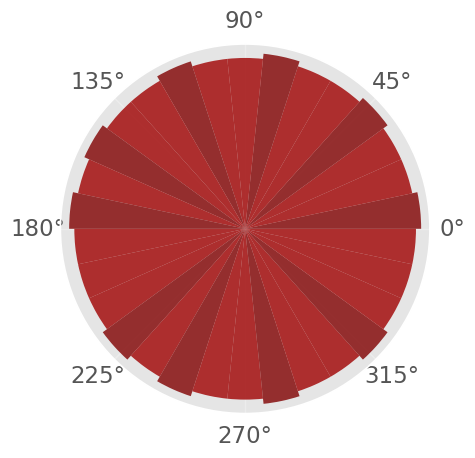

In [29]:
print("円の法線ベクトルの統計情報:")
print(f"平均法線ベクトル: {circle_stats['mean_normal']}")
print(f"平均角度: {circle_stats['mean_angle'] * 180 / np.pi}")
print(f"集中度: {circle_stats['concentration']}")
print(f"R値: {circle_stats['R']}")


VonMisesDistAnalyzer.display_polar_histogaram(np.arctan2(circle_normals[:, 1], circle_normals[:, 0]), N=30)

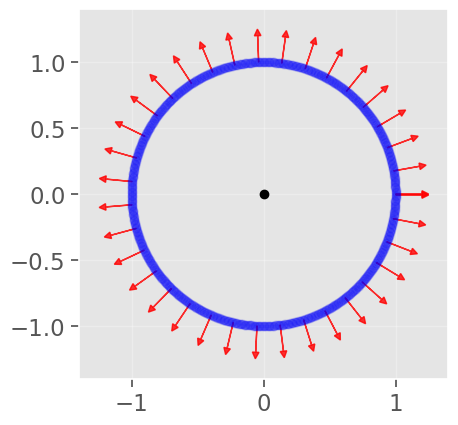

In [33]:
# 図形と代表的な法線を描画
def plot_polygon_with_normals(points, normals, border_lim=1.4, num_normals=36):
    """
    図形と代表的な法線ベクトルを描画する
    
    Args:
        points: 円周上の点の座標
        normals: 法線ベクトル
        num_normals: 表示する法線の数
    """
    ax = plt.gca()
    
    # 円周上の点をプロット
    ax.plot(points[:, 0], points[:, 1], 'o', alpha=0.1, color='blue')
    
    # 選択した点の法線を矢印で表示
    total_points = len(points)
    indices = np.linspace(0, total_points-1, num_normals, dtype=int)
    
    for i in indices:
        x, y = points[i]
        nx, ny = normals[i]
        ax.arrow(x, y, nx*0.2, ny*0.2, head_width=0.05, head_length=0.05, 
                 fc='red', ec='red', alpha=0.8)
    
    # 中心点（原点）を表示
    ax.plot(0, 0, 'ko')
    
    # グラフの設定
    ax.set(aspect=1)
    ax.grid(True, alpha=0.3)
    ax.set_xlim(-border_lim, border_lim)
    ax.set_ylim(-border_lim, border_lim)
    
    plt.show()

# 使用例
plot_polygon_with_normals(circle_points, circle_normals, num_normals=36)


正方形の法線ベクトルの統計情報:
平均法線ベクトル: [0.00100402 0.00100402]
平均角度: 45.0
集中度: 0.0028397891324729446
R値: 0.0014198931349127864


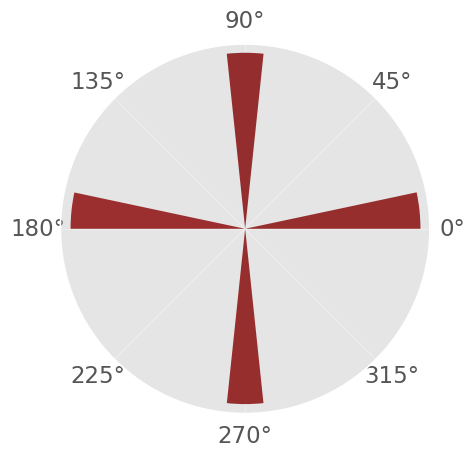

In [31]:
print("\n正方形の法線ベクトルの統計情報:")
print(f"平均法線ベクトル: {square_stats['mean_normal']}")
print(f"平均角度: {square_stats['mean_angle']* 180 / np.pi}")
print(f"集中度: {square_stats['concentration']}")
print(f"R値: {square_stats['R']}")

VonMisesDistAnalyzer.display_polar_histogaram(np.arctan2(square_normals[:, 1], square_normals[:, 0]), N=30)

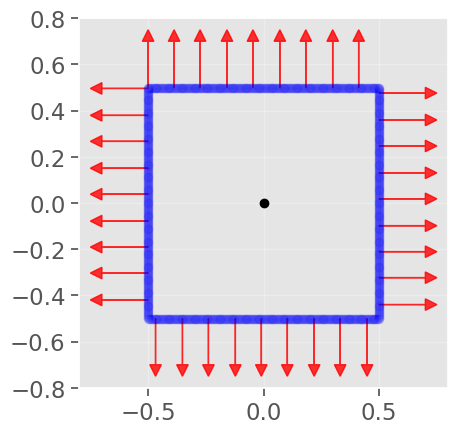

In [37]:
# 使用例
plot_polygon_with_normals(square_points, square_normals, border_lim=.8, num_normals=36)
